In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!ls

ML_Lesson 1.pdf
ML_Lesson2.pdf
ML_Lesson3.pdf
ML_Lesson4_pdf.pdf
ML_Lesson5.pdf
lesson 3&4.ipynb
lesson2.ipynb
meeting 1 code.ipynb
project
李怡然 Meeting Minutes 会议纪要 week1.docx
李怡然 Meeting Minutes 会议纪要 week2.docx
李怡然 Meeting Minutes 会议纪要 week3.docx
李怡然 Meeting Minutes 会议纪要 week4.docx


In [3]:
os.chdir("/Users/amy/Desktop/INTERN/amazon/project")

In [4]:
!ls

Meeting Report.docx        mt lesson 3&4.py
Week 2 Meeting Report.docx mt_lesson 2.py
leason 5&6.ipynb           wage.xlsx
lesson 1 code.ipynb        ~$eting Report.docx
life_time1.xlsx            ~$life_time1.xlsx


In [5]:
df=pd.read_excel('life_time1.xlsx')

In [6]:
df.head()

,S1,S2,S3,S4,S5,S6,S7,S9,S10,lifetime
0,0,58,15,28,7,13,182,0,0.809037,3689
1,0,61,6,34,7,11,410,0,0.743515,3123
2,4,50,7,32,3,10,121,0,0.799561,2923
3,3,42,2,8,1,0,126,0,0.770653,1370
4,0,0,0,1,0,0,0,0,1.000000,5


In [7]:
df.shape

(5670, 10)

In [8]:
df.isna().sum()

S1          0
S2          0
S3          0
S4          0
S5          0
S6          0
S7          0
S9          0
S10         0
lifetime    0
dtype: int64

In [9]:
#data clean
def data_clean(dt):
    df.fillna(0,inplace=True)
    print(df.isna().sum())

In [10]:
data_clean(df)

S1          0
S2          0
S3          0
S4          0
S5          0
S6          0
S7          0
S9          0
S10         0
lifetime    0
dtype: int64


In [11]:
df.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S9', 'S10', 'lifetime'], dtype='object')

In [12]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S9,S10,lifetime
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,1.173016,27.623280,5.718695,19.603527,2.619400,6.101411,94.102998,0.027690,0.827053,1714.549735
std,7.686291,53.473682,16.678327,32.718249,4.680602,10.509617,514.355675,0.399031,0.166522,2155.030019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.769448,158.000000
50%,0.000000,10.000000,1.000000,8.000000,1.000000,2.000000,7.000000,0.000000,0.869459,940.500000
75%,1.000000,32.000000,6.000000,25.000000,3.000000,8.000000,40.000000,0.000000,0.930074,2482.000000
max,263.000000,904.000000,481.000000,553.000000,55.000000,189.000000,19066.000000,24.000000,1.000000,19014.000000


In [13]:
def boxplot(dt):
    columns = df.columns
    num_features = [col for col in columns if dt[col].dtype!='O']
    for num_col in num_features:
        sns.boxplot(dt[num_col],orient='v')
        plt.show()

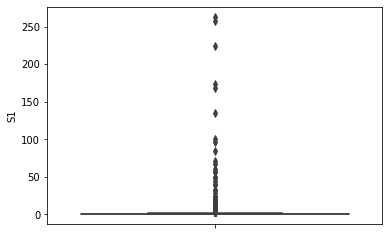

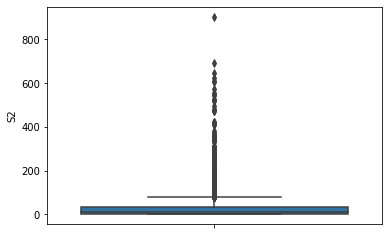

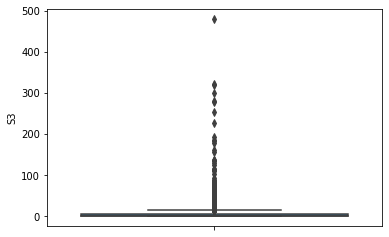

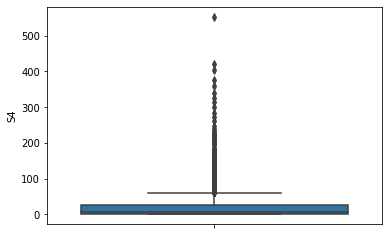

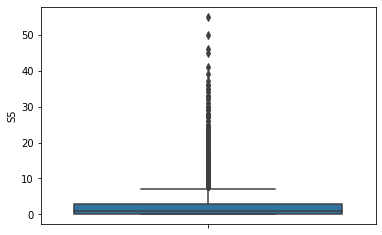

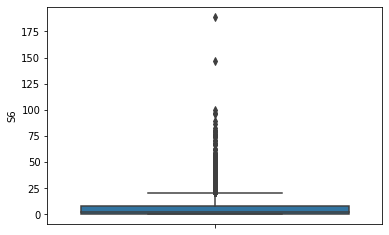

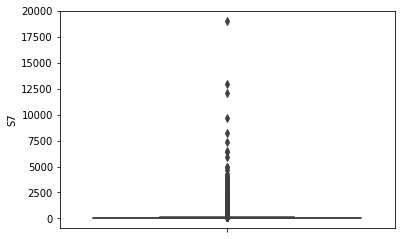

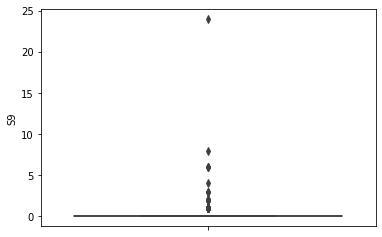

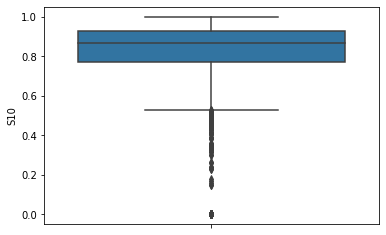

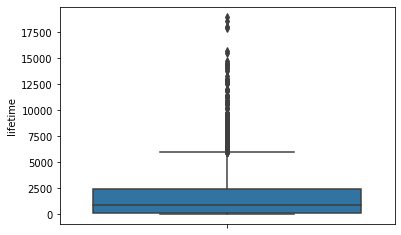

In [14]:
boxplot(df)

In [17]:
def dist(dt):
    columns = df.columns
    num_features = [col for col in columns if dt[col].dtype!='O']
    for num_col in num_features:
        sns.distplot(dt[num_col], kde_kws={'bw': 0.1})
        plt.show()

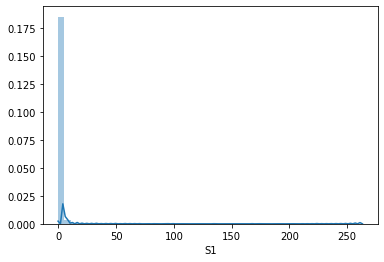

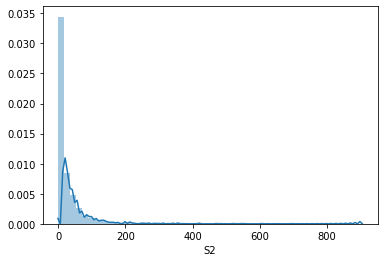

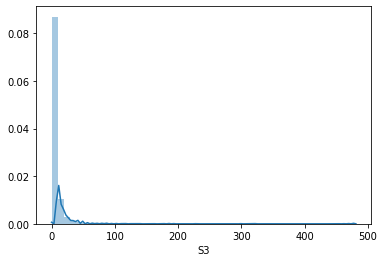

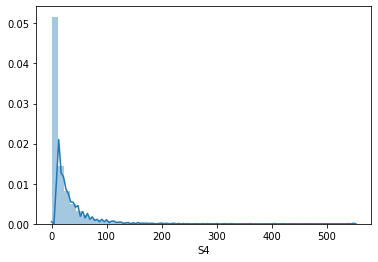

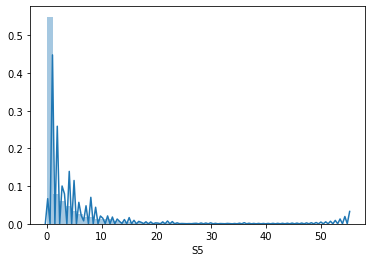

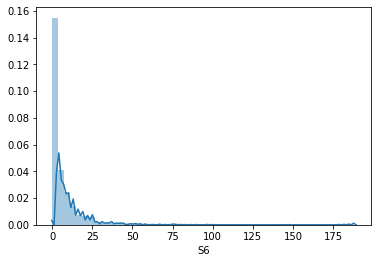

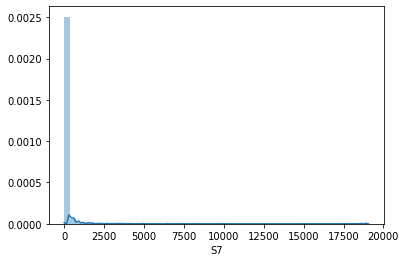

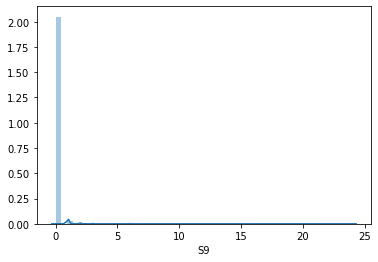

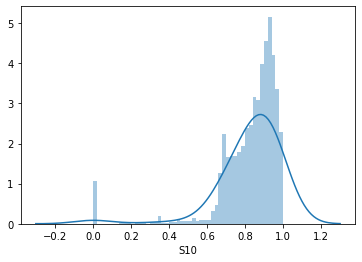

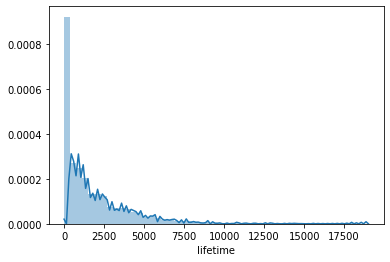

In [18]:
dist(df)

In [19]:
def handle_oulier(col):
    df[col]=np.log1p(df[col])

In [20]:
for column in df.columns:
    handle_oulier(column)

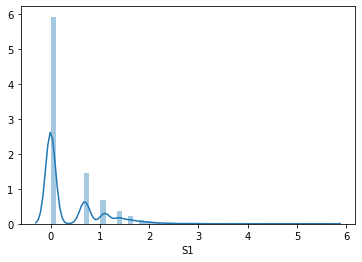

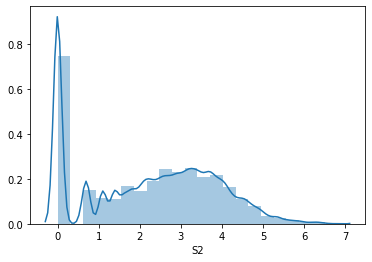

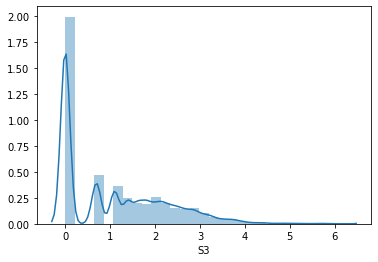

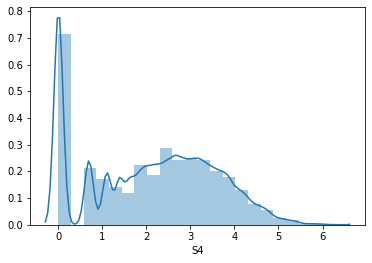

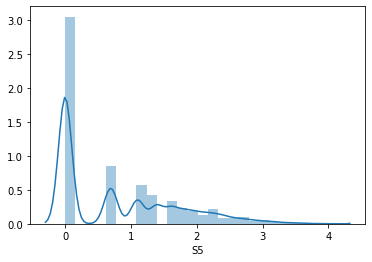

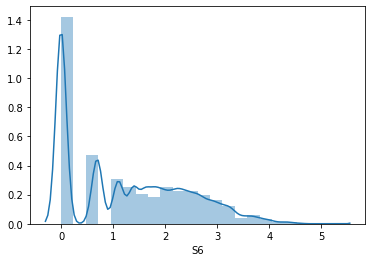

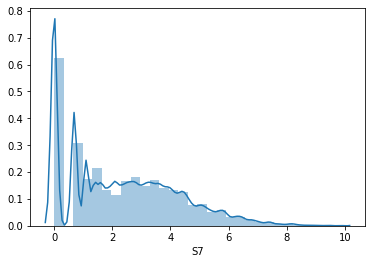

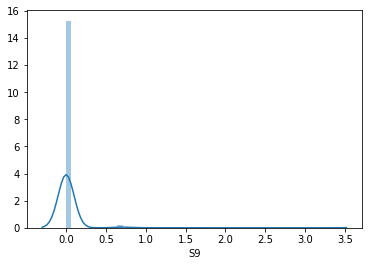

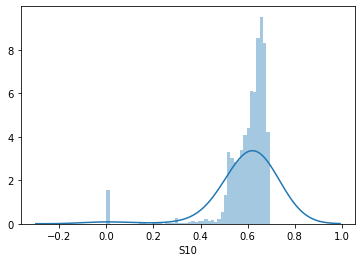

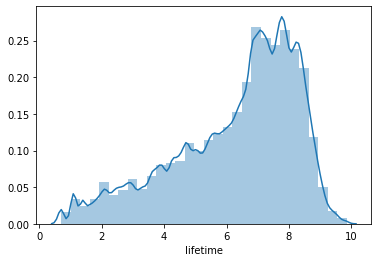

In [21]:
dist(df)

In [12]:
## correlation
df.corr()

,S1,S2,S3,S4,S5,S6,S7,S9,S10,lifetime
S1,1.000000,0.127257,0.091862,0.347052,0.158790,0.130533,0.038222,0.085283,0.038633,0.168322
S2,0.127257,1.000000,0.316938,0.506368,0.748902,0.509701,0.172092,-0.010283,0.118661,0.625348
S3,0.091862,0.316938,1.000000,0.737153,0.302432,0.457013,0.110284,0.000243,0.104324,0.451861
S4,0.347052,0.506368,0.737153,1.000000,0.594651,0.641978,0.139650,0.067884,0.147426,0.576015
S5,0.158790,0.748902,0.302432,0.594651,1.000000,0.472707,0.155661,-0.000684,0.110527,0.547009
S6,0.130533,0.509701,0.457013,0.641978,0.472707,1.000000,0.136223,0.001139,0.175458,0.658488
S7,0.038222,0.172092,0.110284,0.139650,0.155661,0.136223,1.000000,-0.004724,-0.109865,0.168432
S9,0.085283,-0.010283,0.000243,0.067884,-0.000684,0.001139,-0.004724,1.000000,0.015956,-0.022606
S10,0.038633,0.118661,0.104324,0.147426,0.110527,0.175458,-0.109865,0.015956,1.000000,0.127232
lifetime,0.168322,0.625348,0.451861,0.576015,0.547009,0.658488,0.168432,-0.022606,0.127232,1.000000


In [24]:
correlation = df.corr()['lifetime']
correlation.sort_values(ascending=False)

lifetime    1.000000
S2          0.795861
S3          0.687732
S6          0.662132
S4          0.645947
S5          0.552672
S7          0.519335
S1          0.474317
S10         0.275752
S9         -0.062282
Name: lifetime, dtype: float64

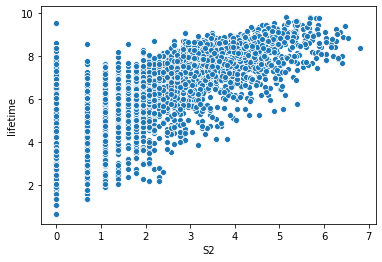

In [25]:
sns.scatterplot(data=df,x='S2',y='lifetime')

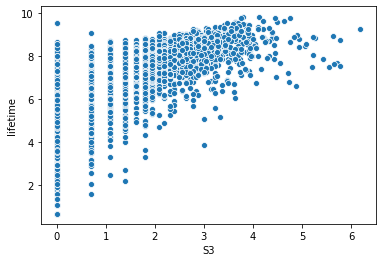

In [26]:
sns.scatterplot(data=df,x="S3",y='lifetime')

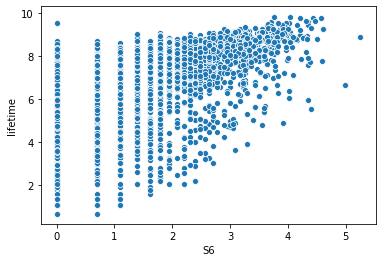

In [27]:
sns.scatterplot(data=df,x="S6",y='lifetime')

In [13]:
y = df["lifetime"]
x = df.drop("lifetime",axis=1)

In [14]:
#Preprocess X to range(0,1)
minmax = MinMaxScaler()
minmax.fit(x)
x_minmax = minmax.transform(x)

In [15]:
x.head()

,S1,S2,S3,S4,S5,S6,S7,S9,S10
0,0,58,15,28,7,13,182,0,0.809037
1,0,61,6,34,7,11,410,0,0.743515
2,4,50,7,32,3,10,121,0,0.799561
3,3,42,2,8,1,0,126,0,0.770653
4,0,0,0,1,0,0,0,0,1.000000


In [16]:
x_minmax

array([[0.00000000e+00, 6.41592920e-02, 3.11850312e-02, ...,
        9.54578831e-03, 0.00000000e+00, 8.09037433e-01],
       [0.00000000e+00, 6.74778761e-02, 1.24740125e-02, ...,
        2.15042484e-02, 0.00000000e+00, 7.43514938e-01],
       [1.52091255e-02, 5.53097345e-02, 1.45530146e-02, ...,
        6.34637575e-03, 0.00000000e+00, 7.99561404e-01],
       ...,
       [0.00000000e+00, 2.32300885e-02, 1.03950104e-02, ...,
        8.91639568e-04, 0.00000000e+00, 8.68965517e-01],
       [3.80228137e-03, 0.00000000e+00, 2.07900208e-03, ...,
        5.24493863e-05, 0.00000000e+00, 9.03030303e-01],
       [3.80228137e-03, 1.10619469e-03, 0.00000000e+00, ...,
        5.24493863e-05, 0.00000000e+00, 9.64411765e-01]])

In [17]:
#train_test _split
train_x,test_x,train_y,test_y = train_test_split(x_minmax,y,test_size=0.25,random_state=1)

In [18]:
#regression model
lr = LinearRegression()
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)
mse = np.sum((test_y-pred_y)**2)/len(test_y)
smse = np.sqrt(mse)
mean_absolute_error = np.sum(np.absolute(test_y-pred_y))/len(pred_y)
print("mse {}".format(mse))
print("smse {}".format(smse))
print("mean_absolute_error {}".format(mean_absolute_error))

mse 2032268.1531746348
smse 1425.5764283877013
mean_absolute_error 945.4959426588475


In [19]:
#recursive feature elimination
lr1=LinearRegression()
lrfe = RFE(estimator=lr1,n_features_to_select=5,step=1)
lrfe = lrfe.fit(train_x,train_y)
pred_y2 = lrfe.predict(test_x)
mse = np.sum((test_y-pred_y2)**2)/len(test_y)
smse = np.sqrt(mse)
mean_absolute_error = np.sum(np.absolute(test_y-pred_y2))/len(test_y)
print("mse {}".format(mse))
print("smse {}".format(smse))
print("mean_absolute_error {}".format(mean_absolute_error))

mse 2042024.5683649322
smse 1428.9942506409648
mean_absolute_error 947.0239637644825


In [20]:
#recursive feature elimination cv
lrfecv = RFECV(estimator=lr1,min_features_to_select=1,cv=10)
lrfecv = lrfecv.fit(train_x,train_y)
pred_y3 = lrfecv.predict(test_x)
mse = np.sum((test_y-pred_y3)**2)/len(test_y)
smse = np.sqrt(mse)
mean_absolute_error = np.sum(np.absolute(test_y-pred_y3))/len(test_y)
print("mse {}".format(mse))
print("smse {}".format(smse))
print("mean_absolute_error {}".format(mean_absolute_error))

mse 2049937.0234201842
smse 1431.7601137830961
mean_absolute_error 948.1423854426587


(array([3.836e+03, 1.017e+03, 5.010e+02, 1.840e+02, 7.900e+01, 2.300e+01,
        1.400e+01, 9.000e+00, 2.000e+00, 5.000e+00]),
 array([1.00000e+00, 1.90230e+03, 3.80360e+03, 5.70490e+03, 7.60620e+03,
        9.50750e+03, 1.14088e+04, 1.33101e+04, 1.52114e+04, 1.71127e+04,
        1.90140e+04]),
 <a list of 10 Patch objects>)

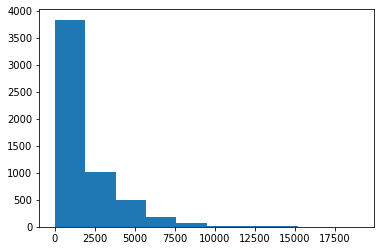

In [21]:
dt = pd.read_excel("life_time1.xlsx")
plt.hist(dt.lifetime)

In [22]:
print(str(np.percentile(dt['lifetime'],99)/(60*24))+ ' day is '+str(99)+'percentile')
print(str(np.percentile(dt['lifetime'],97.5)/(60*24))+ ' day is '+str(97.5)+'percentile')
print(str(np.percentile(dt['lifetime'],95)/(60*24))+ ' day is '+str(95)+'percentile')
print(str(np.percentile(dt['lifetime'],90)/(60*24))+ ' day is '+str(90)+'percentile')

6.47229166666667 day is 99percentile
5.121545138888876 day is 97.5percentile
4.144097222222223 day is 95percentile
3.149652777777779 day is 90percentile


In [23]:
#life time duration is more than 1 minute and less than 4 days
dt2 = dt[(dt.lifetime>1)&(dt.lifetime<57600)]

In [24]:
#create a column with life time less than 1 hour
dt2['lifelessthan60'] = np.where(dt2.lifetime<60,1,0)

In [25]:
#check dataset balance
np.sum(dt2.lifelessthan60)/len(dt2.lifelessthan60)

0.15222399432925748

In [26]:
from sklearn.metrics import plot_confusion_matrix

In [27]:
pip install delayed

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import imblearn
print(imblearn.__version__)

0.8.0


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
#balance train data
y=dt2.lifelessthan60
X = dt2.drop(['lifelessthan60','lifetime'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X_train,y_train)
#os_X = pd.DataFrame(data=os_data_X,columns=X.columns)
#os_y = pd.DataFrame(data=os_data_y,columns=["lessthan60mins"])
print("life more than 60",sum(os_data_y==0))
print("life less than 60",sum(os_data_y==1))

life more than 60 3589
life less than 60 3589


In [47]:
#build Logistic Regression model
lgr = LogisticRegression()
lgr.fit(os_data_X,os_data_y)
predict = lgr.predict(X_test)

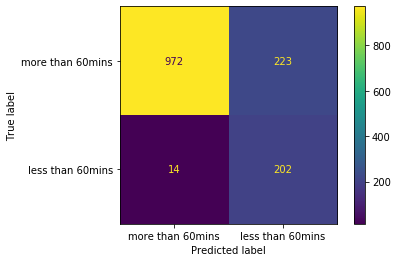

In [48]:
plot_confusion_matrix(lgr,X_test,y_test,display_labels=["more than 60mins","less than 60mins"])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1195
           1       0.48      0.94      0.63       216

    accuracy                           0.83      1411
   macro avg       0.73      0.87      0.76      1411
weighted avg       0.91      0.83      0.85      1411



In [34]:
from sklearn.tree import DecisionTreeClassifier

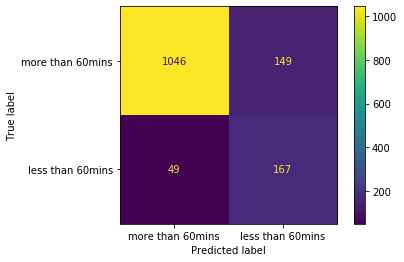

In [53]:
##default configuration
DT = DecisionTreeClassifier()
DT.fit(os_data_X,os_data_y)
pred = DT.predict(X_test)
plot_confusion_matrix(DT,X_test,y_test,display_labels=["more than 60mins","less than 60mins"])

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1195
           1       0.53      0.77      0.63       216

    accuracy                           0.86      1411
   macro avg       0.74      0.82      0.77      1411
weighted avg       0.89      0.86      0.87      1411



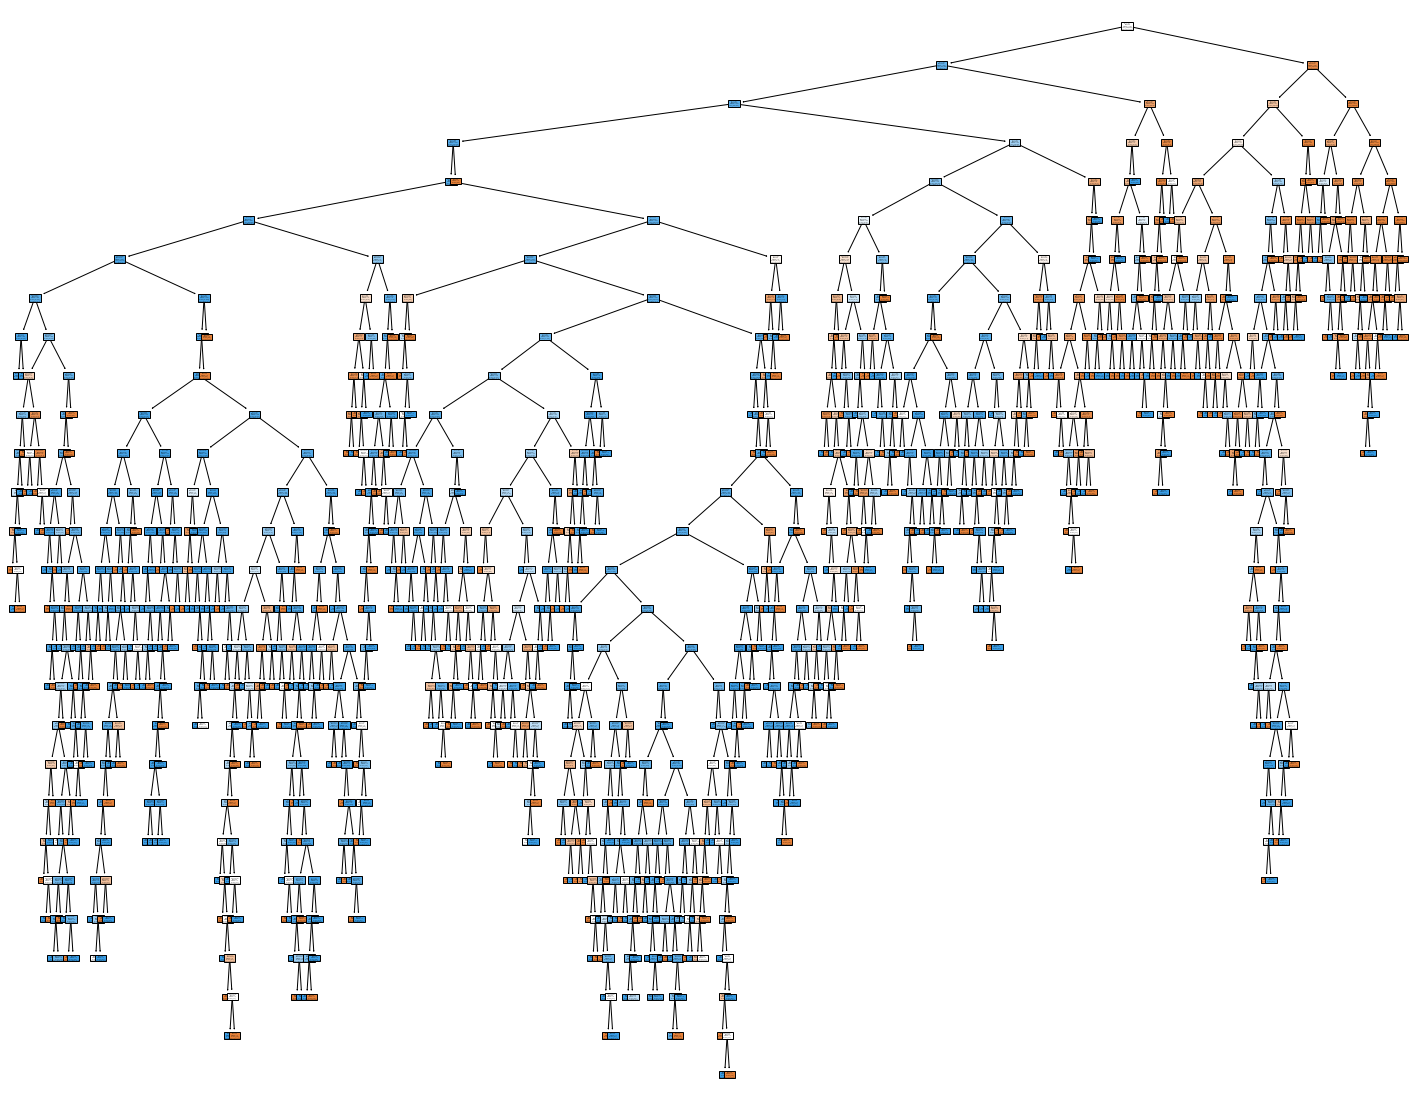

In [55]:
#draw a tree
#!pip install graphviz
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=X.columns,class_names=['less than 60','more than 60'],filled=True)

In [56]:
importance = pd.DataFrame()
importance['score']=DT.feature_importances_
importance['features']=X.columns
importance.sort_values(by=['score'],ascending=False)

,score,features
1,0.617135,S2
8,0.133735,S10
5,0.057060,S6
6,0.056422,S7
2,0.054876,S3
3,0.054653,S4
4,0.016332,S5
0,0.006369,S1
7,0.003416,S9


In [57]:
##Trunning feature
from sklearn.model_selection import RandomizedSearchCV
params={
    'max_depth':np.arange(10,100,5),
    'min_samples_split':np.arange(1,10,a1),
    'min_samples_leaf':[1,2],
    'min_impurity_decrease':np.arange(0,1,0.01)
}
classfier = DecisionTreeClassifier()
random_search = RandomizedSearchCV(classfier,param_distributions=params,n_iter=50,scoring='roc_auc',n_jobs=-1,cv=15,verbose=3)

In [58]:
random_search.fit(X_train,y_train)

Fitting 15 folds for each of 50 candidates, totalling 750 fits


RandomizedSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0....
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'min_samples_leaf': [1, 2],
                                        'm

In [59]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=60, min_impurity_decrease=0.03,
                       min_samples_split=6)

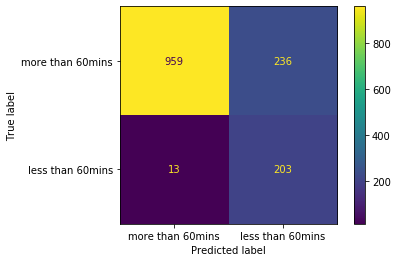

In [60]:
DT2  =DecisionTreeClassifier(max_depth=60, min_impurity_decrease=0.03,
                       min_samples_leaf=2, min_samples_split=6)
DT2.fit(os_data_X,os_data_y)
pred2 = DT2.predict(X_test)
plot_confusion_matrix(DT2,X_test,y_test,display_labels=["more than 60mins","less than 60mins"])

In [61]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1195
           1       0.46      0.94      0.62       216

    accuracy                           0.82      1411
   macro avg       0.72      0.87      0.75      1411
weighted avg       0.91      0.82      0.84      1411



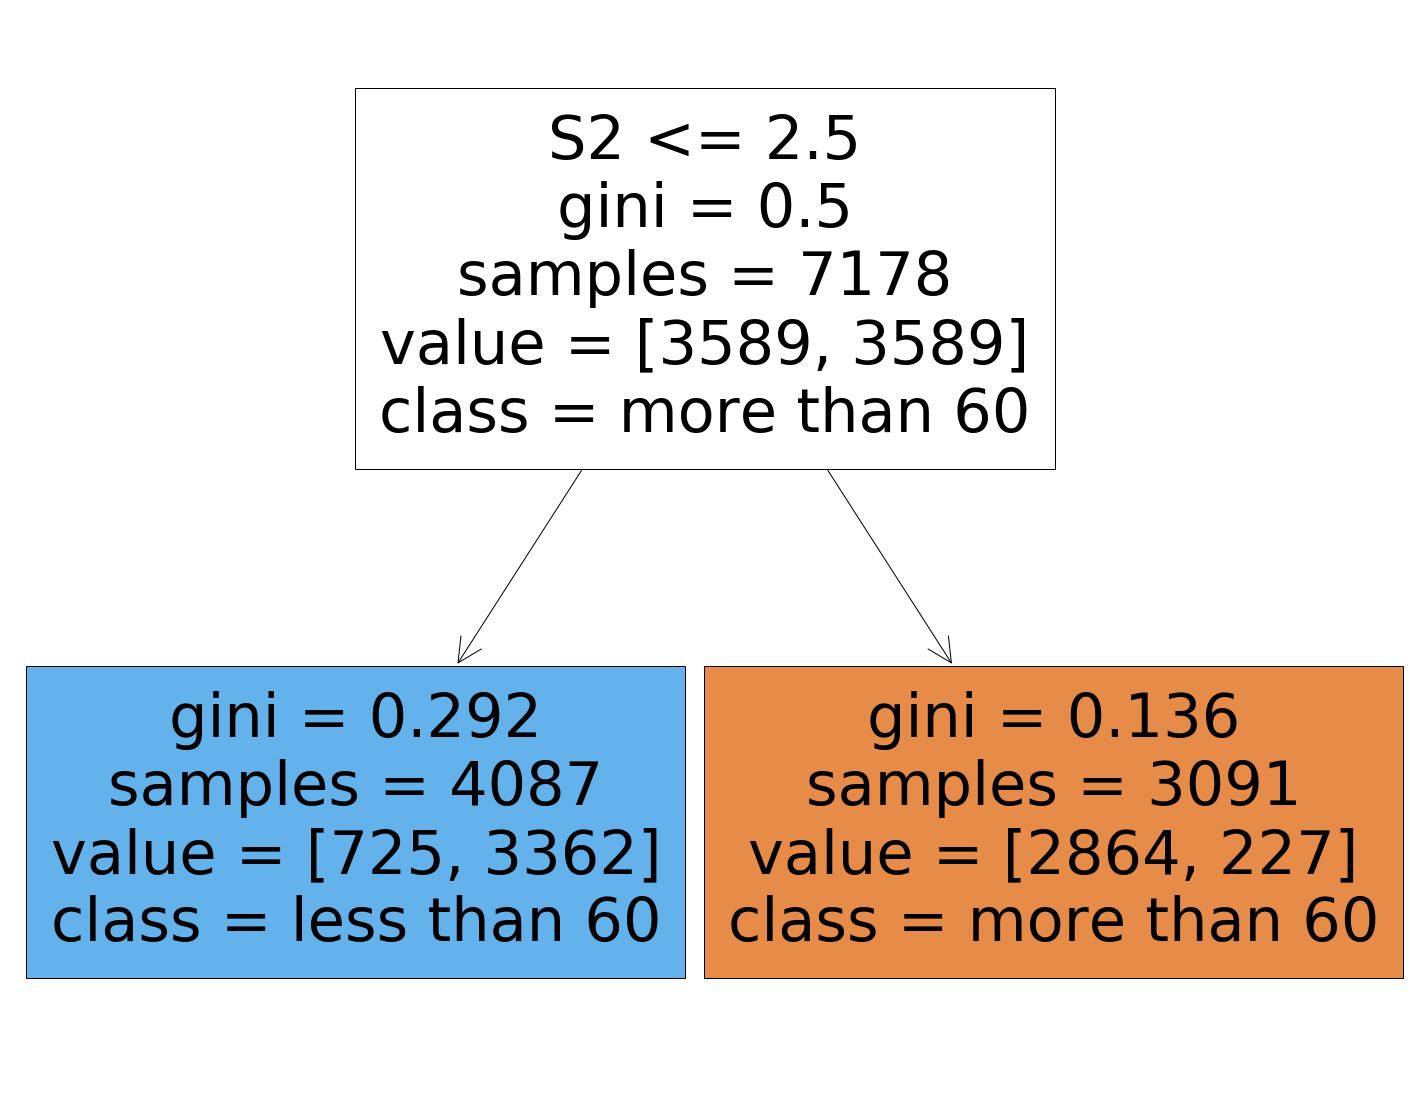

In [62]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(DT2,feature_names=X.columns,class_names=['more than 60','less than 60'],filled=True)

In [63]:
importance = pd.DataFrame()
importance['score']=DT2.feature_importances_
importance['features']=X.columns
importance.sort_values(by=['score'],ascending=False)

,score,features
1,1.0,S2
0,0.0,S1
2,0.0,S3
3,0.0,S4
4,0.0,S5
5,0.0,S6
6,0.0,S7
7,0.0,S9
8,0.0,S10
